In [112]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [113]:
data = pd.read_csv(r'D:\Datasets\StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [114]:
data.shape

(1000, 8)

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Feature Engineering

In [116]:
data['total'] = round((data['math score'] + data['writing score'] + data ['reading score'])/3,2)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


In [117]:
data['total'].describe()

count    1000.000000
mean       67.770580
std        14.257311
min         9.000000
25%        58.330000
50%        68.330000
75%        77.670000
max       100.000000
Name: total, dtype: float64

In [118]:
min_passing_marks = 55
data['status'] = np.where(data['total']>=min_passing_marks ,1,0)    # 1 - Pass    0 - Fail 
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,status
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,1
1,female,group C,some college,standard,completed,69,90,88,82.33,1
2,female,group B,master's degree,standard,none,90,95,93,92.67,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,0
4,male,group C,some college,standard,none,76,78,75,76.33,1


In [119]:
data.drop(['math score','reading score','writing score','total'],axis=1,inplace=True)

In [120]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,status
0,female,group B,bachelor's degree,standard,none,1
1,female,group C,some college,standard,completed,1
2,female,group B,master's degree,standard,none,1
3,male,group A,associate's degree,free/reduced,none,0
4,male,group C,some college,standard,none,1


## Gender

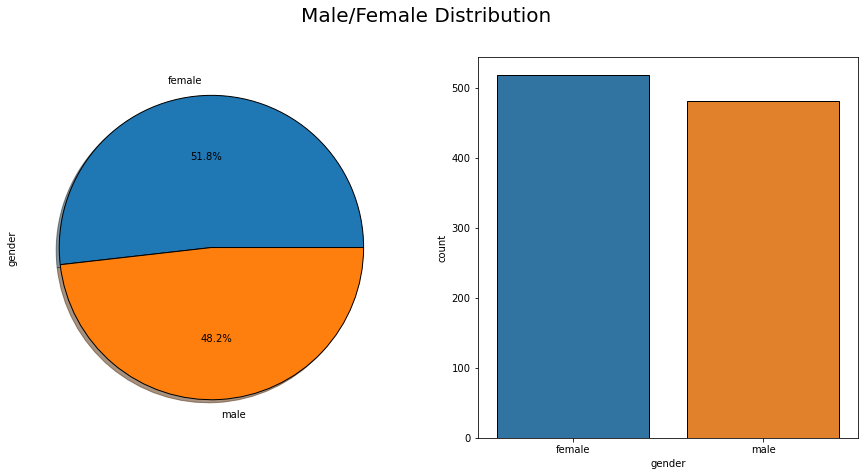

In [121]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
data['gender'].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',ax=ax[0],wedgeprops={'edgecolor':'black'})
sbn.countplot(x='gender',data=data,ax=ax[1],edgecolor='black')
plt.suptitle('Male/Female Distribution',fontsize=20)
plt.show()

In [122]:
data['gender'] = np.where(data['gender']=='male',1,0)

In [123]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,status
0,0,group B,bachelor's degree,standard,none,1
1,0,group C,some college,standard,completed,1
2,0,group B,master's degree,standard,none,1
3,1,group A,associate's degree,free/reduced,none,0
4,1,group C,some college,standard,none,1


## Race/Ethnicity

In [124]:
data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

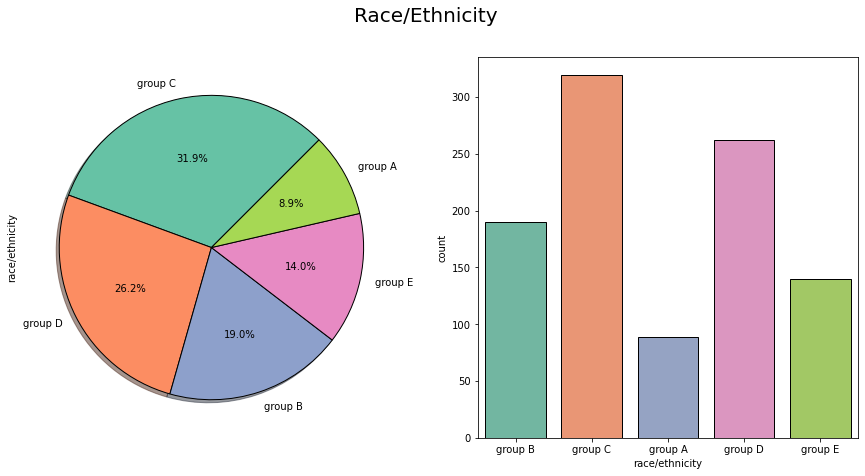

In [125]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
data['race/ethnicity'].value_counts().plot.pie(wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%',ax=ax[0],startangle=45,colors=sbn.color_palette('Set2'))
sbn.countplot(x='race/ethnicity',data=data,ax=ax[1],palette=('Set2'),edgecolor='black')
plt.suptitle('Race/Ethnicity',fontsize=20)
plt.show()

In [126]:
races=pd.get_dummies(data['race/ethnicity'],drop_first=True)
races.head()

,group B,group C,group D,group E
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [127]:
data = pd.concat([data,races],axis=1)
data.drop('race/ethnicity',axis=1,inplace=True)
data.head()

,gender,parental level of education,lunch,test preparation course,status,group B,group C,group D,group E
0,0,bachelor's degree,standard,none,1,1,0,0,0
1,0,some college,standard,completed,1,0,1,0,0
2,0,master's degree,standard,none,1,1,0,0,0
3,1,associate's degree,free/reduced,none,0,0,0,0,0
4,1,some college,standard,none,1,0,1,0,0


## Parental Level Of Education

In [128]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

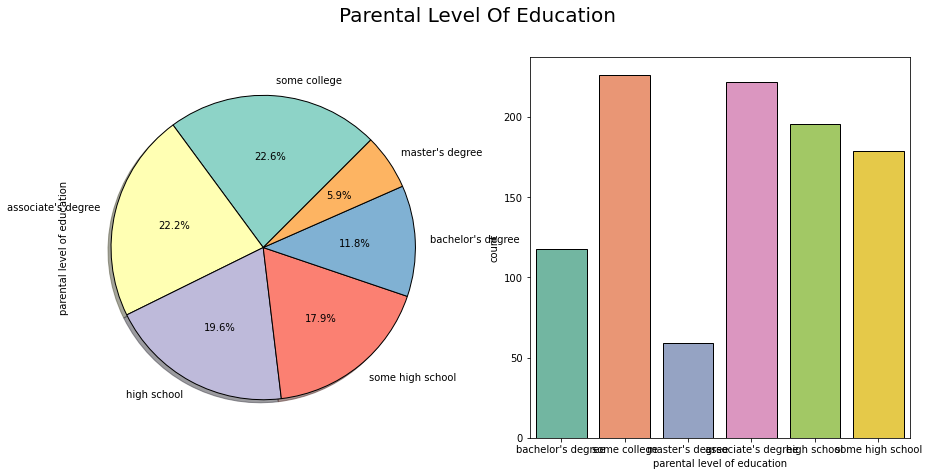

In [129]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
data['parental level of education'].value_counts().plot.pie(wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%',ax=ax[0],startangle=45,colors=sbn.color_palette('Set3'))
sbn.countplot(x='parental level of education',data=data,ax=ax[1],palette=('Set3'),edgecolor='black')
plt.suptitle('Parental Level Of Education',fontsize=20)
plt.show()

In [130]:
# using labelencoder

In [131]:
from sklearn.preprocessing import LabelEncoder

In [133]:
encoder = LabelEncoder()
data['parental level of education']=encoder.fit_transform(data['parental level of education'])
data.head()

,gender,parental level of education,lunch,test preparation course,status,group B,group C,group D,group E
0,0,1,standard,none,1,1,0,0,0
1,0,4,standard,completed,1,0,1,0,0
2,0,3,standard,none,1,1,0,0,0
3,1,0,free/reduced,none,0,0,0,0,0
4,1,4,standard,none,1,0,1,0,0


## Lunch

In [136]:
data['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

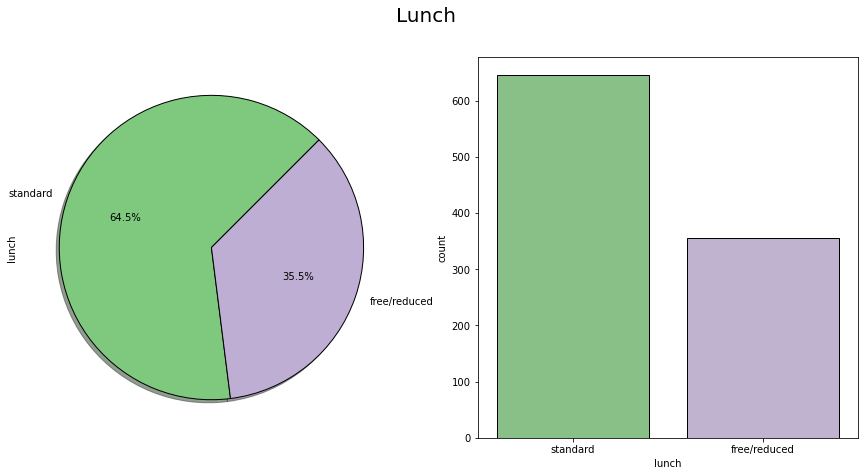

In [138]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
data['lunch'].value_counts().plot.pie(wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%',ax=ax[0],startangle=45,colors=sbn.color_palette('Accent'))
sbn.countplot(x='lunch',data=data,ax=ax[1],palette=('Accent'),edgecolor='black')
plt.suptitle('Lunch',fontsize=20)
plt.show()

In [139]:
data['lunch'] = np.where(data['lunch']=='standard',1,0)   #1 - standard   2 - free/reduced
data.head()

,gender,parental level of education,lunch,test preparation course,status,group B,group C,group D,group E
0,0,1,1,none,1,1,0,0,0
1,0,4,1,completed,1,0,1,0,0
2,0,3,1,none,1,1,0,0,0
3,1,0,0,none,0,0,0,0,0
4,1,4,1,none,1,0,1,0,0


## Test Preparation Course

In [140]:
data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

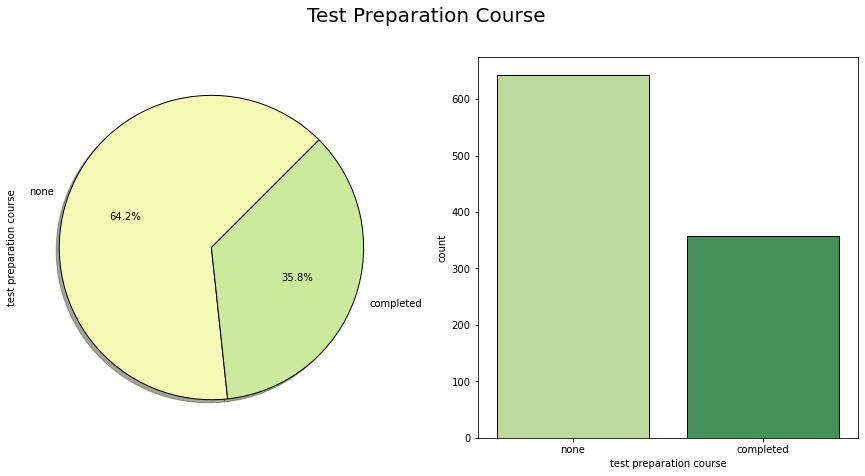

In [186]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
data['test preparation course'].value_counts().plot.pie(wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%',ax=ax[0],startangle=45,colors=sbn.color_palette('YlGn'))
sbn.countplot(x='test preparation course',data=data,ax=ax[1],palette=('YlGn'),edgecolor='black')
plt.suptitle('Test Preparation Course',fontsize=20)
plt.show()

In [187]:
data['test preparation course'] = np.where(data['test preparation course']=='none',0,1)   # none - 0 , completed - 1
data.head()

,gender,parental level of education,lunch,test preparation course,status,group B,group C,group D,group E
0,0,1,1,0,1,1,0,0,0
1,0,4,1,1,1,0,1,0,0
2,0,3,1,0,1,1,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,4,1,0,1,0,1,0,0


#### Featured Engineering Done!!!Now seperating dependent and independent features..

In [191]:
x = data.drop('status',axis=1)
y = data['status']
print(y.head())

0    1
1    1
2    1
3    0
4    1
Name: status, dtype: int32


In [192]:
y.value_counts()

1    809
0    191
Name: status, dtype: int64

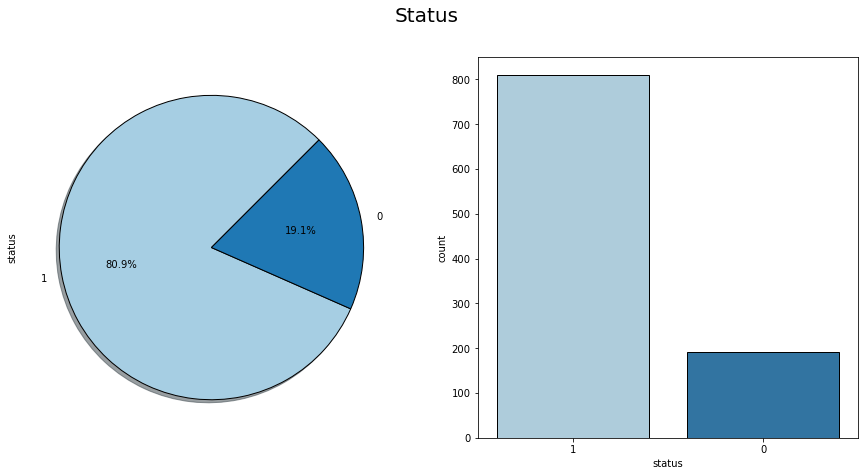

In [197]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
data['status'].value_counts().plot.pie(wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%',ax=ax[0],startangle=45,colors=sbn.color_palette('Paired'))
sbn.countplot(x='status',data=data,ax=ax[1],palette=('Paired'),edgecolor='black',order=[1,0])
plt.suptitle('Status',fontsize=20)
plt.show()

#### The dataset is imbalanced i.e the dependent features are not normally distributed so to fix this we use over sampling or under sampling.Mostly over sampling is preferred because under sampling can cause loss of important data

In [198]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

In [200]:
x,y = ros.fit_sample(x,y)

In [201]:
print(x.shape,y.shape)

(1618, 8) (1618,)


In [204]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618 entries, 0 to 1617
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1618 non-null   int32
 1   parental level of education  1618 non-null   int32
 2   lunch                        1618 non-null   int32
 3   test preparation course      1618 non-null   int32
 4   group B                      1618 non-null   uint8
 5   group C                      1618 non-null   uint8
 6   group D                      1618 non-null   uint8
 7   group E                      1618 non-null   uint8
dtypes: int32(4), uint8(4)
memory usage: 31.7 KB


In [206]:
y.shape

(1618,)

In [207]:
y.value_counts()

1    809
0    809
Name: status, dtype: int64

#### Hence by using RandomOverSampler we have balanced the dataset

In [209]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
x = preprocessing.normalize(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)


In [212]:
from lazypredict.Supervised import LazyClassifier
lpc = LazyClassifier()
models,predictions = lpc.fit(x_train,x_test,y_train,y_test)

 93%|████████████████████████████████████████████████████████████████████████████▌     | 28/30 [00:03<00:00, 10.11it/s]

[14:04:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  7.19it/s]


In [213]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,0.72,0.72,0.72,0.72,0.03
ExtraTreesClassifier,0.72,0.71,0.71,0.72,0.36
LabelPropagation,0.72,0.71,0.71,0.72,0.14
LabelSpreading,0.72,0.71,0.71,0.72,0.18
ExtraTreeClassifier,0.72,0.71,0.71,0.71,0.02
RandomForestClassifier,0.71,0.71,0.71,0.71,0.41
LGBMClassifier,0.71,0.71,0.71,0.71,0.21
XGBClassifier,0.71,0.71,0.71,0.71,0.87
BaggingClassifier,0.71,0.71,0.71,0.71,0.08
